In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# train_df

In [ ]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [ ]:
train_df.info() # 모두 int형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [ ]:
train_df.isnull().sum() # 결측치 없음

user    0
item    0
time    0
dtype: int64

In [ ]:
print('train_df 길이: ', len(train_df)) #5154471
print('user 수: ', train_df['user'].nunique()) #31360
print('시청 item 수: ', train_df['item'].nunique()) #6807

train_df 길이:  5154471
user 수:  31360
시청 item 수:  6807


# title_data

In [ ]:
title_data.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [ ]:
title_data.info() #결측치 없음. 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


- item 수가 6807개이고 train_df에서 본 nunique한 item 수도 6807로, 리스트에 있는 모든 영화를 적어도 유저들이 한 번씩 보았다. (안 본 영화 없음)

In [ ]:
# 중복 제목 영화가 있는지 체크
title_data[title_data['title'].duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


- War of the Worlds라는 같은 영화가 3408, 64997이라는 item 넘버링으로 나뉘어져 있다. (차후 수정 방안 고민)

In [ ]:
### Brill
print('34048로 라벨링된 유저의 수:',len(train_df[train_df['item']==34048]))
print('64997로 라벨링된 유저의 수:',len(train_df[train_df['item']==64997]))

34048로 라벨링된 유저의 수: 3022
64997로 라벨링된 유저의 수: 178


- 만일 수정한다면 64997을 34048로 수정해도 좋을 것 같다!

# year_data

In [ ]:
year_data.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [ ]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [ ]:
print('가장 최근 영화 개봉 년도: ', max(year_data['year']))
print('가장 오래된 영화 개봉 년도: ', min(year_data['year']))
print('평균 영화 개봉 년도: ', np.mean(year_data['year']))

가장 최근 영화 개봉 년도:  2014
가장 오래된 영화 개봉 년도:  1922
평균 영화 개봉 년도:  1992.1747315781734


# director_data

In [ ]:
director_data.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [ ]:
director_data.info() # 자료형 확인, 결측치 없음, 5905

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [ ]:
print('감독 수: ', director_data.director.nunique()) # 1340명의 영화 감독
print('감독 정보가 있는 영화 수: ', len(director_data)) # 5905개의 영화에 감독정보가 있음.

감독 수:  1340
감독 정보가 있는 영화 수:  5905


In [ ]:
print('감독별 영화 제작 수 top5')
print(director_data['director'].value_counts().head()) # 최대 44
print('감독별 영화 제작 수 bottom5')
print(director_data['director'].value_counts().tail()) # 최소 2

감독별 영화 제작 수 top5
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
Name: director, dtype: int64
감독별 영화 제작 수 bottom5
nm0404606    2
nm0405605    2
nm0410139    2
nm0410769    2
nm9054338    2
Name: director, dtype: int64


In [ ]:
# 감독 정보가 없는 영화 수
print(title_data.item.nunique() - director_data['item'].nunique()) #1304
print(round((title_data.item.nunique()-director_data['item'].nunique())/len(title_data)*100,2),'%') #19.16%

1304
19.16 %


- 전체 영화 중 감독 정보가 없는 영화는 1304개이고 이는 전체 영화 중에서 약 19.16%를 차지한다.

# writer_data

In [ ]:
writer_data.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [ ]:
writer_data.info() # 자료형 확인, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [ ]:
print('작가 수: ', writer_data.writer.nunique()) # 2989명의 영화 작가
print('작가 정보가 있는 영화 수: ', len(writer_data)) # 11306개의 영화에 작가 정보가 있음.

작가 수:  2989
작가 정보가 있는 영화 수:  11306


In [ ]:
print('작가별 영화 제작 수 top5')
print(writer_data['writer'].value_counts().head()) # 최대 47
print('작가별 영화 제작 수 bottom5')
print(writer_data['writer'].value_counts().tail()) # 최소 2

작가별 영화 제작 수 top5
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
Name: writer, dtype: int64
작가별 영화 제작 수 bottom5
nm0414893    2
nm0414448    2
nm0414117    2
nm0414047    2
nm5927608    2
Name: writer, dtype: int64


In [ ]:
writer_cnt = writer_data['writer'].value_counts()
writer_cnt.describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [ ]:
# 작가 정보가 없는 영화 수
print(title_data.item.nunique() - writer_data['item'].nunique()) #1159
print(round((title_data.item.nunique()-writer_data['item'].nunique())/len(title_data)*100,2),'%') #17.03%

1159
17.03 %


# genre_data

In [ ]:
genre_data.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [ ]:
genre_data.info() #자료형 확인, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [ ]:
genre_data.item.nunique() #모든 영화에 대해 장르 정보가 다 있음.

6807

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


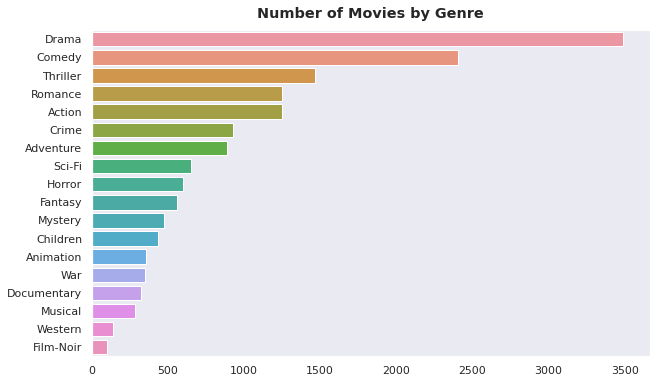

In [ ]:
# 장르별 영화 개수 확인 (중복 허용)
num_genre = genre_data['genre'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- Drama가 압도적으로 많다. 한 영화당 여러 장르가 포함되는 중복인걸 감안하면, 웬만한 영화는 Drama에 속한 것으로 보인다.

In [ ]:
gen_cnt_all = pd.DataFrame(genre_data.genre.value_counts()/title_data.item.nunique()*100)

In [ ]:
gen_cnt_all

,genre
Drama,51.270751
Comedy,35.375349
Thriller,21.536653
Romance,18.378140
Action,18.304686
Crime,13.574262
Adventure,13.089467
Sci-Fi,9.593066
Horror,8.843837
Fantasy,8.182753


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


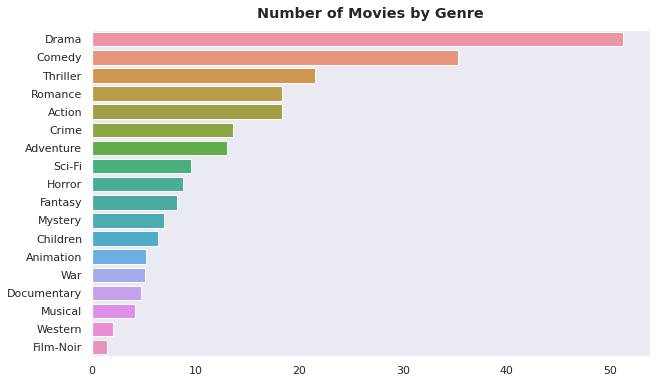

In [ ]:
# 더 구체적으로, 전체 영화 개수에서의 각 장르별 영화 개수 비율을 확인해보자.
num_genre = genre_data.genre.value_counts()/title_data.item.nunique()*100
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")